In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime
pd.options.mode.chained_assignment = None 

In [2]:
import os
import sys

In [3]:
sys.path.append(os.path.join(os.path.dirname('__file__'), 'utils'))

In [4]:
from functions import *

In [5]:
cw_d = "./dataset/inputs/"

In [6]:
ndvi_df = pd.read_csv(cw_d + "ndvi.csv")
nnirv_df = pd.read_csv(cw_d + "nnirv.csv")
ndvi_df.columns = ["date", "NDVI"]
nnirv_df = nnirv_df[["system:time_start", "NNIRV"]]
nnirv_df.columns = ["date", "NNIRV"]

In [7]:
#nnirv_df.head()

In [8]:
#ndvi_df.isna().any()


In [9]:
#indexed_ndvi_df.head()

In [10]:
nnirv_dates_formated = [datetime.strptime(d ,"%d-%b-%y") for d in list(nnirv_df.date)]
ndvi_dates_formated = [datetime.strptime(d ,"%d-%b-%y") for d in list(ndvi_df.date)]

In [11]:
nnirv_df.NNIRV = [str_to_float(n) for n in nnirv_df.NNIRV]
ndvi_df.NDVI = [str_to_float(n) for n in ndvi_df.NDVI]

In [12]:
ndvi_df.date = ndvi_dates_formated 
nnirv_df.date = nnirv_dates_formated 

In [13]:
ndvi_dates_col = [set_intevals(1, 16, d, d.month)  for d in ndvi_dates_formated]
ndvi_df["date_intervals"] = ndvi_dates_col
ndvi_df.head()

date NDVI    date_intervals
0 2018-01-27   No  17 - 31 Jan 2018
1 2018-01-27   No  17 - 31 Jan 2018
2 2018-02-04   No  01 - 16 Feb 2018
3 2018-02-06   No  01 - 16 Feb 2018
4 2018-03-08   No  01 - 16 Mar 2018

In [14]:
ndvi_years = [d.year for d in  ndvi_dates_formated]

In [15]:
ndvi_df["years"] = ndvi_years 

In [39]:
ndvi_df.head()
ndvi_df = ndvi_df.sort_values(by="date")

In [40]:
nnirv_dates_col = [set_intevals(1, 16, d, d.month)  for d in nnirv_dates_formated]
nnirv_df["date_intervals"] = nnirv_dates_col
nnirv_df.head()

date     NNIRV    date_intervals  years
0 2018-01-27  1048.940  17 - 31 Jan 2018   2018
1 2018-01-27   811.749  17 - 31 Jan 2018   2018
2 2018-02-04   966.929  01 - 16 Feb 2018   2018
3 2018-02-06  1098.220  01 - 16 Feb 2018   2018
4 2018-03-08  1322.750  01 - 16 Mar 2018   2018

In [41]:
nnirv_years = [d.year for d in  nnirv_dates_formated]

In [42]:
nnirv_df["years"] =nnirv_years

In [43]:
nnirv_df

date     NNIRV    date_intervals  years
0   2018-01-27  1048.940  17 - 31 Jan 2018   2018
1   2018-01-27   811.749  17 - 31 Jan 2018   2018
2   2018-02-04   966.929  01 - 16 Feb 2018   2018
3   2018-02-06  1098.220  01 - 16 Feb 2018   2018
4   2018-03-08  1322.750  01 - 16 Mar 2018   2018
..         ...       ...               ...    ...
270 2020-12-02  1124.330  01 - 16 Dec 2020   2020
271 2020-12-02   978.772  01 - 16 Dec 2020   2020
272 2020-12-05  1064.960  01 - 16 Dec 2020   2020
273 2020-12-25   900.695  17 - 31 Dec 2020   2020
274 2020-12-27  1279.820  17 - 31 Dec 2020   2020

[275 rows x 4 columns]

In [44]:
grouped_nnirv = nnirv_df.groupby(["years", "date_intervals"])[["NNIRV"]].mean()
grouped_nnirv = grouped_nnirv.reset_index()

In [50]:
intervals = grouped_nnirv["date_intervals"]
grouped_nnirv.shape
len(intervals)

59

<ipython-input-53-126a6a4545bb>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  rects = ax.set_xticklabels(x_pos)
<ipython-input-53-126a6a4545bb>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(intervals)
<ipython-input-53-126a6a4545bb>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())


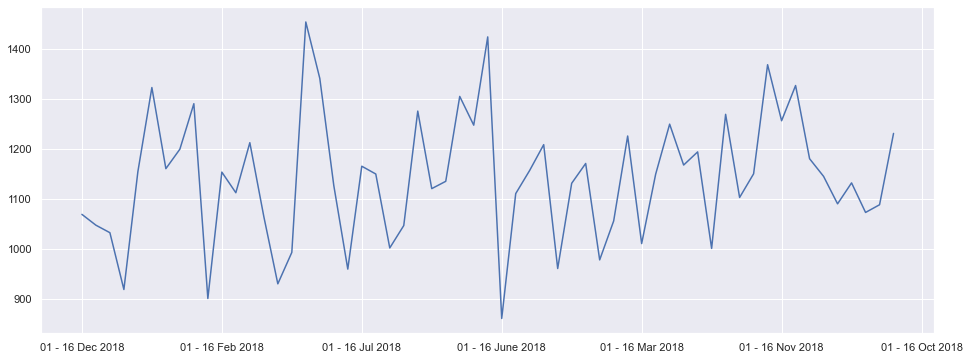

In [53]:
sns.set(rc={'figure.figsize':(16,6)})
fig, ax = plt.subplots(sharey=True, sharex=True)
import textwrap
width = 0.25
x_pos = np.arange(len(intervals))
max_width = 20
_ = ax.plot(list(grouped_nnirv["NNIRV"]))
rects = ax.set_xticklabels(x_pos)
_ = ax.set_xticklabels(intervals)
_ = ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())